## A3 Car Price Prediction

#### 1. Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.4')

#### 2. Load Data

In [3]:
df = pd.read_csv('./data/Cars.csv')

In [4]:
df.shape

(8128, 13)

In [5]:
# checking the data in the dataset; head()--> 5 data from top
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# to understand the mathematical values of the columns
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


#### Data Cleaning and Pre Processing

In [8]:
# checking unique values for the owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [9]:
# mapping 'owner' column to appropriate values
owner_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner_map)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [10]:
# checking unique values for the fuel column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
# selecting only Diesel and Petrol cars
df.drop(df[(df['fuel'] == 'LPG') | (df['fuel'] == 'CNG')].index, inplace = True)
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [12]:
# removing "kmpl" from mileage column
df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['mileage'].head()

0     23.4 
1    21.14 
2     17.7 
3     23.0 
4     16.1 
Name: mileage, dtype: object

In [13]:
# changing the data type of mileage column to float
df['mileage'] = df['mileage'].astype(float)
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [14]:
# removing "CC" from engine column
df['engine'] = df['engine'].str.replace('CC', '')
df['engine'].head()

0    1248 
1    1498 
2    1497 
3    1396 
4    1298 
Name: engine, dtype: object

In [15]:
# changing the data type of engine column to float
df['engine'] = df['engine'].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [16]:
# removing "bhp" from max_power column
df['max_power'] = df['max_power'].str.replace('bhp', '')
df['max_power'].head()

0        74 
1    103.52 
2        78 
3        90 
4      88.2 
Name: max_power, dtype: object

In [17]:
# changing the data type of max_power column to float
df['max_power'] = df['max_power'].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [18]:
# taking only the first word from the "name" column
df['name'] = df['name'].str.split().str.get(0)

In [19]:
# checking unique values for the name column
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [20]:
# dropping the 'torque' column
df.drop('torque', axis = 1, inplace = True)

In [21]:
# removing rows with owner value of 5 i.e., 'Test Drive Car'
df.drop(df[df['owner'] == 5].index, inplace = True)

#### Explanatory Data Analysis (EDA)

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


##### Distribution Plot

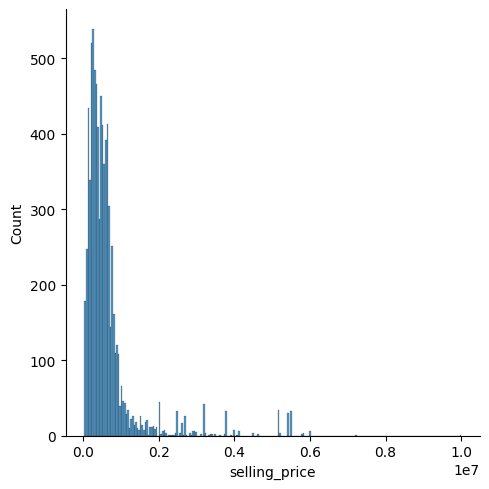

In [23]:
# checking the distribution of selling_price
# selling price is found to be right skewed
sns.displot(df['selling_price'])
plt.show()

##### Scatter Plot

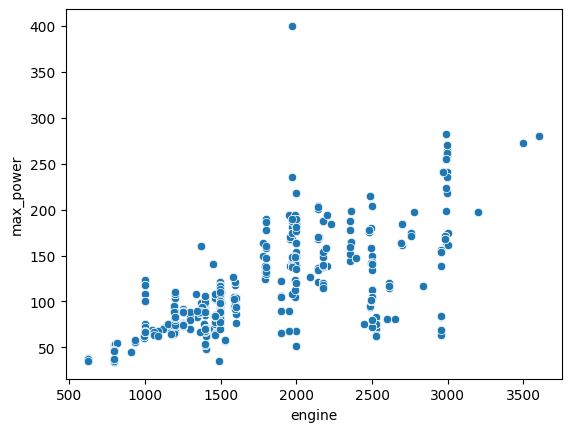

In [24]:
# as the engine CC increases, max power of the car is also found to increase
# showing a positive correlation between engine and max_power
sns.scatterplot(x='engine', y='max_power', data=df)
plt.show()

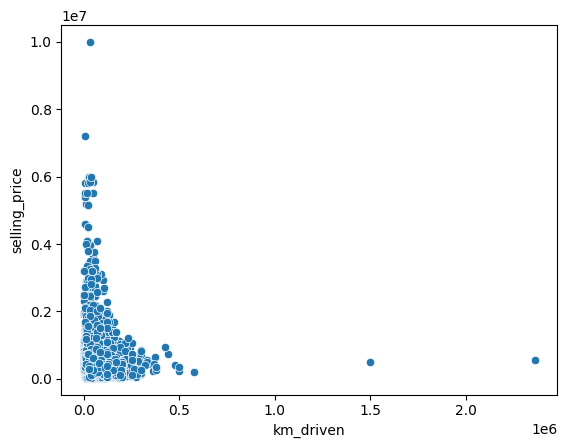

In [25]:
# km_driven vs selling_price
# the selling price of the cars decreases as the km driven increases
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.show()

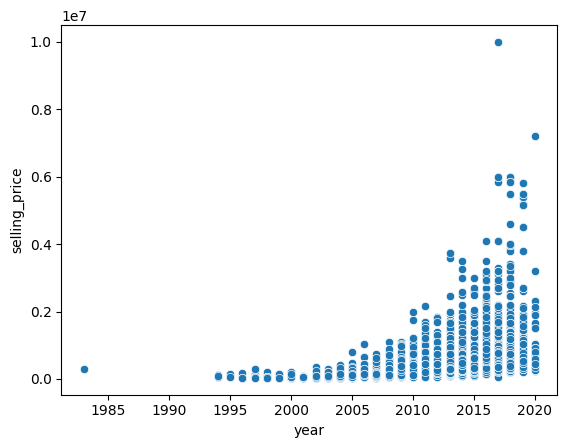

In [26]:
# year vs selling_price
# the selling price of the cars increases as the year increases
sns.scatterplot(x='year', y='selling_price', data=df)
plt.show()

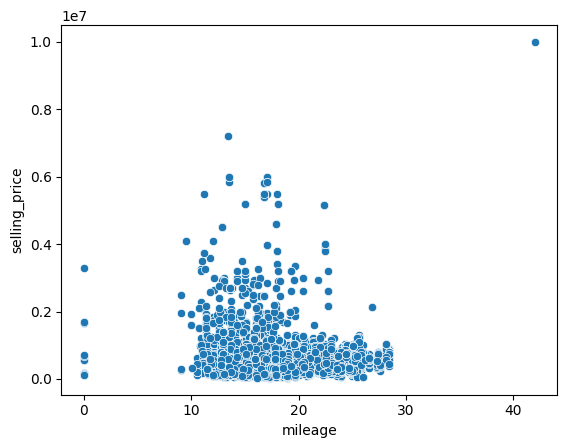

In [27]:
# mileage vs selling_price
# a lot of cars in the dataset have moderate to low mileage
sns.scatterplot(x='mileage', y='selling_price', data=df)
plt.show()

##### One-hot encoding
One hot encoding the 'seller_type' category as there is no natural ordering and to represent it as numerical value

In [28]:
# checking unique values for the seller type
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [29]:
df_encoded = pd.get_dummies(df, columns=['seller_type'])
df_encoded.head()

# seller_type has 3 values and if we do label encoding we will create a unintentional order hence choose one hot encoding 
# df.get_dummies() creates new columns for each unique value in the column we choose.

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,Diesel,Manual,1,23.40,1248.0,74.00,5.0,False,True,False
1,Skoda,2014,370000,120000,Diesel,Manual,2,21.14,1498.0,103.52,5.0,False,True,False
2,Honda,2006,158000,140000,Petrol,Manual,3,17.70,1497.0,78.00,5.0,False,True,False
3,Hyundai,2010,225000,127000,Diesel,Manual,1,23.00,1396.0,90.00,5.0,False,True,False
4,Maruti,2007,130000,120000,Petrol,Manual,1,16.10,1298.0,88.20,5.0,False,True,False


##### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [32]:
# label encoding the fuel column
df_encoded['fuel'] = le.fit_transform(df_encoded['fuel'])

In [33]:
# Check the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Diesel': np.int64(0), 'Petrol': np.int64(1)}


In [34]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [35]:
# label encoding the transmission column
df_encoded['transmission'] = le.fit_transform(df_encoded['transmission'])

In [36]:
# Check the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Automatic': np.int64(0), 'Manual': np.int64(1)}


In [37]:
df_encoded.head()


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,False,True,False
1,Skoda,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,False,True,False
2,Honda,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,False,True,False
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,False,True,False
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,False,True,False


In [38]:
df_encoded = df_encoded.drop('name', axis='columns')


##### Correlation Matrix

Checking correlation between features to understand the strength and direction of relationships between different variables in the dataset

<Axes: >

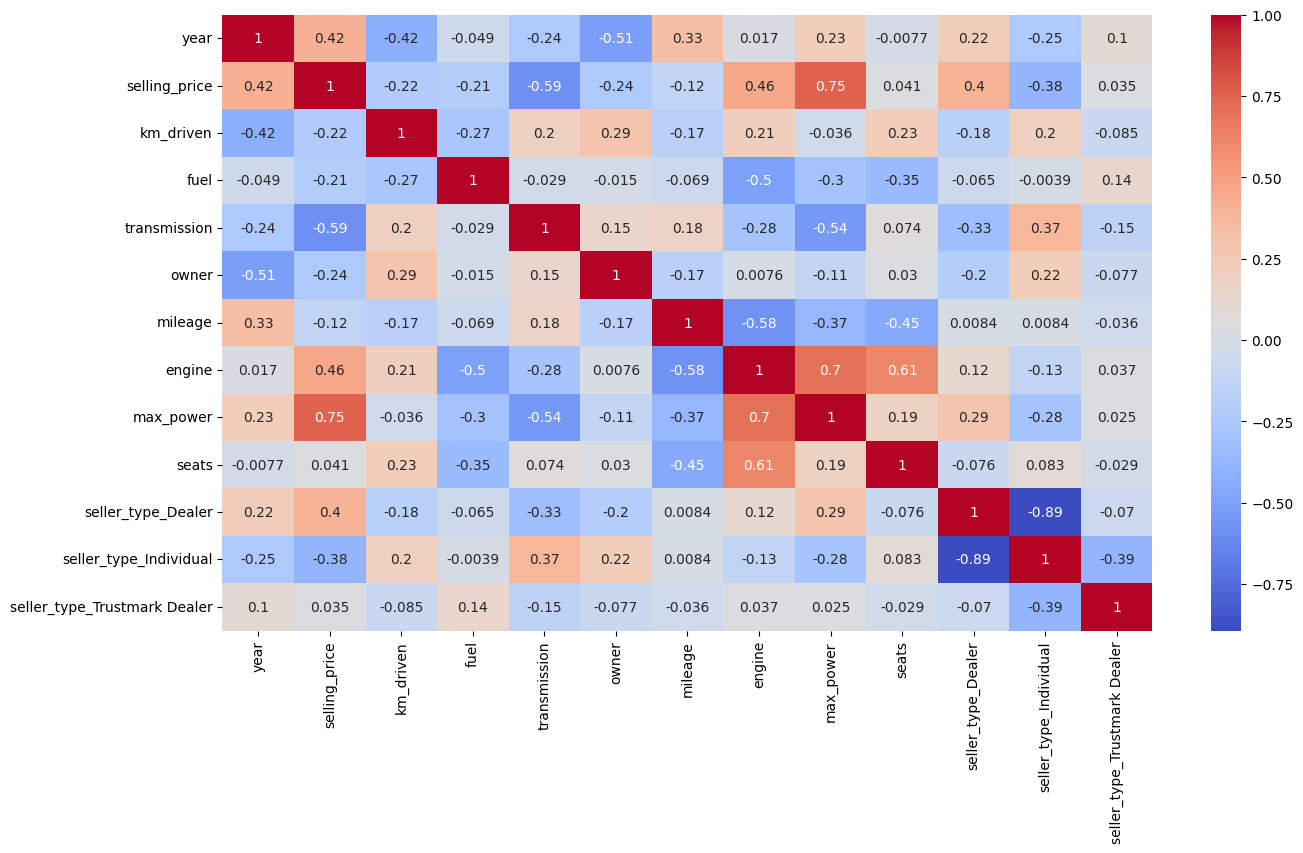

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm") 

# engine and max_power seem to have a high correlation with each other so, i will choose one of them for my model
# year seems to have a positive correlation with selling_price
# km_driven and transmission seems to have a negative correlation with selling_price indicating the price are inversely related to each other.

#### Binning

Converting the label selling price into discrete variable by simply putting the price in a bucket of 0, 1, 2, 3,



In [40]:
# df_encoded['selling_price'] = pd.cut(df_encoded['selling_price'], bins = 4, labels = [0, 1, 2, 3], include_lowest = True)
# doing .cut() resulted in a skewed distribution of the target variable
# selling_price
# 0    7732
# 1     182
# 2     113
# 3       1

# using .qcut() to divide the selling_price into 4 equal bins
# [   29999.,   260000.,   450000.,   680000., 10000000.]
df_encoded['selling_price'] = pd.qcut(df_encoded['selling_price'], q=4, labels=[0, 1, 2, 3])

In [41]:
# number of cars in each category
df_encoded['selling_price'].value_counts()

selling_price
0    2050
1    2044
3    1991
2    1943
Name: count, dtype: int64

In [42]:
df_encoded['selling_price'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

#### Feature Selection

Identifying and selecting the most relevant variables to improve model performance

In [43]:
X = df_encoded[['year', 'engine', 'km_driven', 'mileage']]
assert len(X.shape) == 2

In [44]:
y = df_encoded['selling_price']
assert len(y.shape) == 1

Splitting the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
# test_size=0.3 means 30% of the data will be splitted for testing and 70% for training
# random_state = 12 ; arranging the randomness in same order. ...=12 means: random number generation starts at point 12 so that the results are consistent every time.

#### Preprocessing

##### Null Values
Addressing missing data through methods like imputation

In [46]:
# checking for missing values
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       157
mileage      157
km_driven      0
year           0
dtype: int64

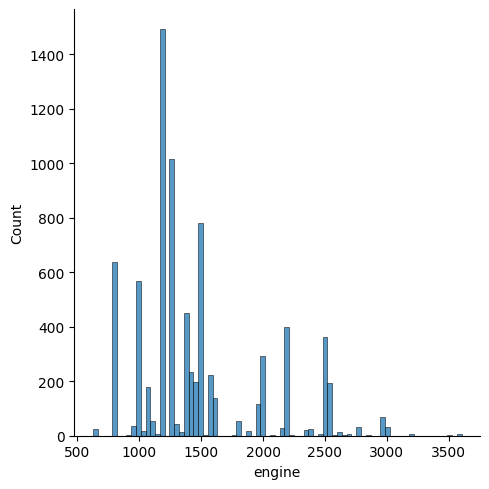

In [47]:
sns.displot(data=df_encoded, x='engine')

# plot generated to check whether it is skewed or normalized to choose between mean and median for filling the null values

In [48]:
df_encoded['engine'].describe()

count    7814.000000
mean     1462.914640
std       504.759742
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

In [49]:
#let's fill the training set for engine
X_train['engine'].fillna(X_train['engine'].median(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean

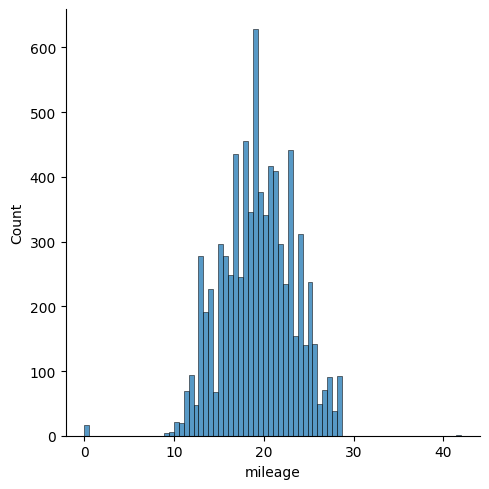

In [50]:
sns.displot(data=df_encoded, x='mileage')

# plot generated to check whether it is skewed or normalized to choose between mean and median for filling the null values

In [51]:
df_encoded['mileage'].describe()

count    7814.000000
mean       19.391962
std         4.001972
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [52]:
#let's fill the training set for mileage
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean

In [53]:
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()


engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [54]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()


engine       57
mileage      57
km_driven     0
year          0
dtype: int64

In [55]:
#let's fill the testing set for testing engine and mileage:
X_test['engine'].fillna(X_train['engine'].median(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean

In [56]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [57]:
y_train.isna().sum()


np.int64(0)

In [58]:
y_test.isna().sum()

np.int64(0)

In [59]:
# checking number of rows
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5619, 4), (5619,), (2409, 4), (2409,))

##### Checking for Outliers

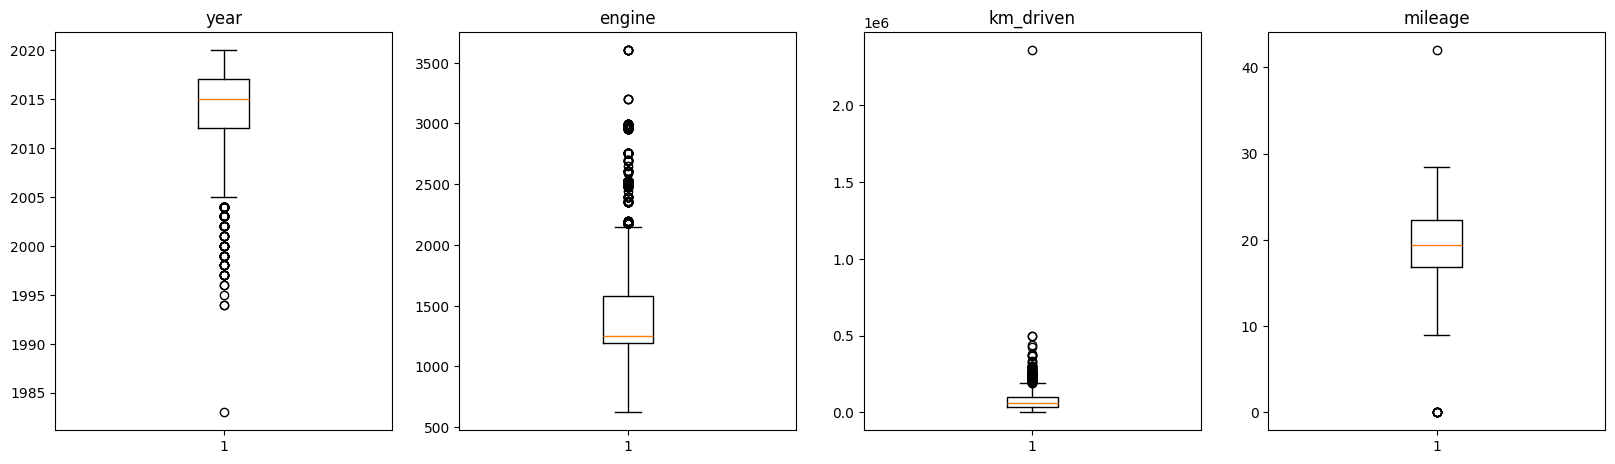

In [60]:
col_dict = {'year':1,'engine':2, 'km_driven':3, 'mileage':4}

# checking outliers
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [61]:
def outlier_count(col, data = X_train): #outlier_count: a function is defined; which is designed to calculate the number and percentage of outliers in a specified column of a dataset
#col: The name of the column for which outliers need to be calculated.
#data: The dataset to use for calculations (default is X_train).  

    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25 #IQR is the range of the middle 50% of the data; Formula: IQR=Q3−Q1.

    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    #np.where: Identifies the rows where the values in the column are either: Greater than max_val (above the upper bound). Less than min_val (below the lower bound).
    #len(): Counts the number of such rows (outliers).

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2) #Divides the count of outliers by the total number of rows in the column to get the percentage. Multiplies by 100 to convert to a percentage and rounds to 2 decimal places.
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [62]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 149
Percent of data that is outlier: 2.65%

---------------engine---------------

Number of outliers: 842
Percent of data that is outlier: 14.98%

---------------km_driven---------------

Number of outliers: 118
Percent of data that is outlier: 2.1%

---------------mileage---------------

Number of outliers: 9
Percent of data that is outlier: 0.16%


#### Scaling

In [63]:
# List of numerical feature names that need to be scaled
from sklearn.preprocessing import StandardScaler

num_cols = ['year', 'engine', 'km_driven', 'mileage']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [64]:
# one hot encoding to avoid ordinal relationships
Y_train_encoded = pd.get_dummies(y_train)

In [65]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [66]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of y_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_test:  (2409,)


In [67]:
#experiment tracking
import mlflow
print(mlflow.__version__)
import os

2.21.2


In [68]:
# mlflow_url = 'https://mlflow.ml.brain.cs.ait.ac.th/'
# mlflow.set_tracking_uri(mlflow_url)

In [69]:
# print (mlflow_url)

In [70]:
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Set the environment variable (if needed)
os.environ["LOGNAME"] = "st124963-NehaShrestha"

# Set the experiment
experiment_name = "st124963-NehaShrestha"
mlflow.set_experiment(experiment_name)

print(f"Experiment '{experiment_name}' set successfully!")

2025/03/29 01:21:52 INFO mlflow.tracking.fluent: Experiment with name 'st124963-NehaShrestha' does not exist. Creating a new experiment.


Experiment 'st124963-NehaShrestha' set successfully!


In [71]:
import time
# from sklearn.inspection import permutation_importance

class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha = 0.001, max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        
        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y, y_pred):
        accuracy = 0

        correct_predictions = np.sum(y == y_pred)
        total_predictions = len(y)
        accuracy = correct_predictions / total_predictions
        
        return accuracy
    
    def precision(self, y, y_pred, c = 0):
        precision = 0
        
        # actually 'c' and predicted 'c'
        true_positives = np.sum((y == c) & (y_pred == c))

        # not actually 'c' but predicted 'c'
        false_positives = np.sum((y != c) & (y_pred == c))

        # checking if denomintor is not zero
        if (true_positives + false_positives) == 0:
            return precision
        
        precision = true_positives / (true_positives + false_positives)
        
        return precision
    
    def recall(self, y, y_pred, c = 0):
        recall = 0
        
        # actually 'c' and predicted 'c'
        true_positives = np.sum((y == c) & (y_pred == c))

        # actually 'c' but predicted not 'c'
        false_negatives = np.sum((y == c) & (y_pred != c))

        # checking if denomintor is not zero
        if (true_positives + false_negatives) == 0:
            return recall
        
        recall = true_positives / (true_positives + false_negatives)
        
        return recall
    
    def f1_score(self, y, y_pred, c = 0):
        precision = self.precision(y, y_pred, c)
        recall = self.recall(y, y_pred, c)

        # checking if denomintor is not zero
        if (precision + recall) == 0:
            return 0
        
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        return f1_score
    
    def macro_precision(self, y, y_pred):
        precision_sum = [self.precision(y, y_pred, c) for c in range(self.k)]

        macro_precision = np.sum(precision_sum) / self.k

        return macro_precision
    
    def macro_recall(self, y, y_pred):
        recall_sum = [self.recall(y, y_pred, c) for c in range(self.k)]

        macro_recall = np.sum(recall_sum) / self.k

        return macro_recall
    
    def macro_f1_score(self, y, y_pred):
        f1_sum = [self.f1_score(y, y_pred, c) for c in range(self.k)]

        macro_f1 = np.sum(f1_sum) / self.k

        return macro_f1

    def weighted_precision(self, y, y_pred):
        precision_sum = [self.precision(y, y_pred, c) for c in range(self.k)]

        # going through every class
        # [0, 1, 2, 1, 2, 1, 0] and if k = 3
        # so for, c = 0
        # [True, False, False, False, False, False, True]
        # OP: 2 -> then go to another class
        class_count = [np.sum(y == c) for c in range(self.k)]

        weighted_precision = np.sum([precision_sum[i] * class_count[i] for i in range(self.k)]) / len(y)

        return weighted_precision

    def weighted_recall(self, y, y_pred):
        recall_sum = [self.recall(y, y_pred, c) for c in range(self.k)]
        class_count = [np.sum(y == c) for c in range(self.k)]

        weighted_recall = np.sum(recall_sum[i] * class_count[i] for i in range(self.k)) / len(y)

        return weighted_recall
    
    def weighted_f1(self, y, y_pred):
        f1_sum = [self.f1_score(y, y_pred, c) for c in range(self.k)]
        class_count = [np.sum(y == c) for c in range(self.k)]

        weighted_f1 = np.sum(f1_sum[i] * class_count[i] for i in range(self.k)) / len(y)

        return weighted_f1

    def classification_report(self, y, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y, y_pred, c),
                   self.recall(y, y_pred, c),
                   self.f1_score(y, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y, y_pred)])

        report.append([self.macro_precision(y, y_pred),
                       self.macro_recall(y, y_pred),
                       self.macro_f1_score(y, y_pred)])

        report.append([self.weighted_precision(y, y_pred),
                       self.weighted_recall(y, y_pred),
                       self.weighted_f1(y, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)

Checking for dummy data

In [72]:
np.random.seed(42)
y_check = np.array([0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0] )  # Actual labels (0, 1, 2)
y_pred_check = np.array([0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1])  # Predicted labels (0, 1, 2)

my_lr = LogisticRegression(regularization=None, k = 3, n = 5, method = "batch")

custom_report = my_lr.classification_report(y_check, y_pred_check)
print("\nCustom Classification Report:")
print(custom_report)


Custom Classification Report:
         precision recall  f1-score
0              0.6   0.75  0.666667
1             0.75   0.75  0.750000
2              1.0   0.75  0.857143
accuracy                   0.750000
macro     0.783333   0.75  0.757937
weighted  0.783333   0.75  0.757937


In [73]:
from sklearn.metrics import classification_report as skl_classification_report
print(skl_classification_report(y_check, y_pred_check))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.75      0.75      0.75         4
           2       1.00      0.75      0.86         4

    accuracy                           0.75        12
   macro avg       0.78      0.75      0.76        12
weighted avg       0.78      0.75      0.76        12



In [74]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class Ridge(LogisticRegression):
    def __init__(self, l, k, n, method, alpha = 0.001, max_iter=5000):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

class Normal(LogisticRegression):
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

#### Experiment

In [75]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [76]:
k = len(set(y))
k

4

In [91]:
from mlflow.tracking import MlflowClient

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""
best_mlrun_id = None

try:
    for reg in regs:
        for method in methods:
            with mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True):

                for alpha in alphas:
                    if reg == "Normal":
                        params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 9000}
                    else:
                        params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 9000}
                    
                    with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                        print("="*30)
                        print(reg, method)
                        print(f"alpha: {alpha}")
                        print("="*30)
                        type_of_regression = str_to_class(reg)
                        model = type_of_regression(**params)  
                        model.fit(X_train, Y_train_encoded)
                        yhat = model.predict(X_test)

                        accuracy = model.accuracy(y_test, yhat)
                        mlflow.log_metric(key="accuracy", value=accuracy)

                        for c in range(k):
                            f1 = model.f1_score(y_test, yhat, c)
                            precision = model.precision(y_test, yhat, c)
                            recall = model.recall(y_test, yhat, c)
                            mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                            mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                            mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                        
                        final_train_loss = model.losses[-1]
                        print(f"Final Training Loss: {final_train_loss}")
                        
                        if final_train_loss < best_train_loss:
                            best_train_loss = final_train_loss
                            best_model = model
                            best_reg_name = reg
                            best_method = method
                            best_mlrun_id = mlflow.active_run().info.run_id

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)   

            mlflow.end_run()

    mlflow.end_run()

    # Register the best model in MLflow Model Registry
    if best_mlrun_id:
        uri = f"runs:/{best_mlrun_id}/model"
        model_name = "st124963-a3-model"

        model_v = mlflow.register_model(uri, model_name)
        print(f"\nRegistered Model: {model_name} (Version: {model_v.version})")

        ml_client = MlflowClient()
        latest_v = ml_client.get_latest_versions(model_name, stages=["None"])[0].version

        ml_client.transition_model_version_stage(name=model_name, version=latest_v, stage="Staging")
        print(f"Model {latest_v} is now in Staging.")

except Exception as e:
    print("Exception: ", e)

Normal batch
alpha: 0.01
Loss at iteration 0 1.3363603735981686
Loss at iteration 500 9.797208438416146
Loss at iteration 1000 9.718262797414383
Loss at iteration 1500 9.613443624877446
Loss at iteration 2000 9.783132485552766
Loss at iteration 2500 10.359062895480326
Loss at iteration 3000 9.7361477326028
Loss at iteration 3500 10.32870545508732
Loss at iteration 4000 10.269265495156265
Loss at iteration 4500 9.663219438442917
Loss at iteration 5000 10.256053175541336
Loss at iteration 5500 9.76637420059618
Loss at iteration 6000 9.601941395735283
Loss at iteration 6500 9.706830353288906
Loss at iteration 7000 10.120021518658248
Loss at iteration 7500 10.259271545436372
Loss at iteration 8000 9.9367595048285
Loss at iteration 8500 10.260703997730527
time taken: 5.644360065460205
Final Training Loss: 6.172582705059404
🏃 View run reg-Normal-method-batch-alpha-0.01 at: http://127.0.0.1:5000/#/experiments/433389547919655421/runs/2ca38139e9e640828832d0ba3fa32c2e
🧪 View experiment at: http:

Successfully registered model 'st124963-a3-model'.
2025/03/29 15:27:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st124963-a3-model, version 1


🏃 View run reg-Ridge-method-sto-alpha-0.0001 at: http://127.0.0.1:5000/#/experiments/433389547919655421/runs/3fd064d309df469cbd4535d3d47ac743
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/433389547919655421
🏃 View run reg-Ridge-method-sto at: http://127.0.0.1:5000/#/experiments/433389547919655421/runs/78f37e792b774f34a6e5e9b31b3ec10e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/433389547919655421

Registered Model: st124963-a3-model (Version: 1)
Model 1 is now in Staging.


Created version '1' of model 'st124963-a3-model'.


In [92]:
print("Best model is:")
print("Regularization:", best_reg_name)
print("Method:", best_method)
print("Final Training loss:", best_train_loss)

# Best model:
# Regularization Ridge
# Method sto
# Final Training loss 0.5291634835252759

Best model is:
Regularization: Ridge
Method: sto
Final Training loss: 0.3363091271470218


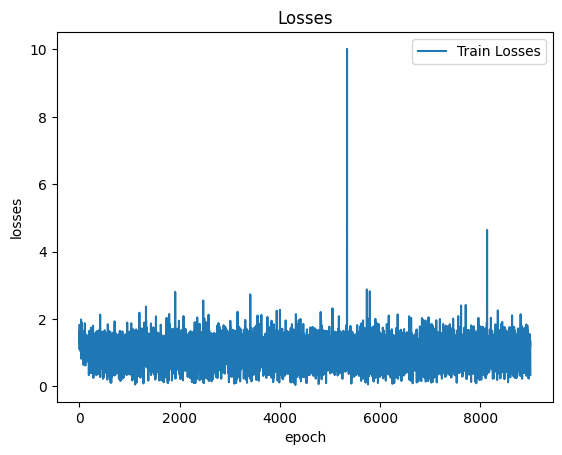

In [93]:
# Visualizing the loss graph
best_model.plot()
plt.show()

In [94]:
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 6, "Custom Classification report", "*" * 6)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = skl_classification_report(y_test, yhat)
print("\n")
print("*" * 6, "Sklearn's Classification report", "*" * 6)
print(sklearn_report)

****** Custom Classification report ******
         precision    recall  f1-score
0         0.612311  0.920455  0.735409
1         0.493506  0.061789  0.109827
2         0.457187  0.505922  0.480321
3         0.593085  0.759796  0.666169
accuracy                      0.560399
macro     0.539022   0.56199  0.497931
weighted   0.53924  0.560399  0.496250


****** Sklearn's Classification report ******
              precision    recall  f1-score   support

           0       0.61      0.92      0.74       616
           1       0.49      0.06      0.11       615
           2       0.46      0.51      0.48       591
           3       0.59      0.76      0.67       587

    accuracy                           0.56      2409
   macro avg       0.54      0.56      0.50      2409
weighted avg       0.54      0.56      0.50      2409



#### Inference

In [95]:
import pickle

model_path = './model/a3_model.model'
pickle.dump(best_model, open(model_path, 'wb'))

In [96]:
scaler_path = './model/a3_scaler.model'
pickle.dump(scaler, open(scaler_path, 'wb'))

In [97]:
loaded_model = pickle.load(open(f"{model_path}", 'rb'))

In [100]:
model_name = "st124963-a3-model"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

In [101]:
precited_selling_price= model.predict(pd.DataFrame(X_test))
precited_selling_price[:15]

array([2, 0, 0, 2, 3, 3, 3, 0, 2, 0, 2, 0, 0, 2, 3])

In [102]:
# The actual values of y
y_test[:15]

array([2, 0, 0, 1, 2, 1, 3, 0, 2, 0, 3, 0, 1, 2, 3])

#### Report

##### Summary

##### Findings